In [1]:
#Group 10: Harihara, Wrootchit ,Zubin

#Implementation of SVM algorithm for our dataset

#We implemented the SVM algorithm for our model using the scikit sklearn package

In [2]:
#Import the necessary packages. For our implementation of SVM, we use the Scikit-sklearn package

import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter                                             #For counting number of each class
from sklearn.model_selection import train_test_split                        #For splitting dataset into training and testing
from sklearn.preprocessing import StandardScaler                            #For normalizing the test data
from sklearn.svm import SVC                                                 #For SVM implementation
from sklearn.metrics import plot_confusion_matrix                           #For plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix        #For plotting the confusion matrix
from sklearn.model_selection import cross_val_score                         #For cross validation of the model

In [3]:
#Before running the code, please download and place the dataset .csv file in the directory.
#The downlaod link is given below.

#'https://sbcb.inf.ufrgs.br/data/cumida/Genes/Leukemia/GSE28497/Leukemia_GSE28497.csv'

In [4]:
#First we open our raw data to check what the dataframe looks like
df = pd.read_csv('Leukemia_GSE28497.csv')
#df = pd.read_csv('Data.csv')
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM705467.CEL.gz,B-CELL_ALL,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
1,GSM705468.CEL.gz,B-CELL_ALL,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
2,GSM705469.CEL.gz,B-CELL_ALL,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
3,GSM705470.CEL.gz,B-CELL_ALL,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
4,GSM705471.CEL.gz,B-CELL_ALL,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,GSM706002.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.692887,4.736595,4.503892,7.484208,3.137376,7.917993,3.858845,3.341846,...,3.215936,3.801296,12.292519,12.288550,3.402729,3.042387,2.965890,2.528686,2.705429,2.762513
277,GSM706003.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.209500,4.566413,4.637307,7.348777,3.018984,6.423441,3.669993,3.406887,...,3.266234,3.873540,11.971540,12.035205,3.321740,3.030698,2.826285,2.573647,2.942468,2.666361
278,GSM706004.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.046964,5.252467,4.420044,7.086734,2.913081,7.723025,3.474380,3.309239,...,3.150403,3.756845,11.977577,11.719864,3.541711,2.959812,2.760271,2.514172,2.811914,2.697337
279,GSM706005.CEL.gz,B-CELL_ALL_ETV6-RUNX1,6.347403,4.903981,4.281019,6.989415,2.968945,7.618195,3.492828,3.266248,...,3.204594,3.918882,11.936382,12.019612,3.383822,2.864419,2.739536,2.585459,2.710848,2.769975


In [5]:
#As we can see, there are 281 samples and 22285 features, with 7 classes. 

In [6]:
#We see that the class names are in the second column, so we print all the unique classes in our dataset.

unique_terms = df['type'].unique()
print(unique_terms)

['B-CELL_ALL' 'B-CELL_ALL_TCF3-PBX1' 'B-CELL_ALL_HYPERDIP'
 'B-CELL_ALL_HYPO' 'B-CELL_ALL_MLL' 'B-CELL_ALL_T-ALL'
 'B-CELL_ALL_ETV6-RUNX1']


In [7]:
#To simplify our classification problem, we replace each unique class (type) with its corresponding index from 1 to 7

#Create a dictionary to simplify the replacement step

map_dict = {'B-CELL_ALL':1, 'B-CELL_ALL_TCF3-PBX1': 2, 'B-CELL_ALL_HYPERDIP': 3,
 'B-CELL_ALL_HYPO': 4, 'B-CELL_ALL_MLL': 5, 'B-CELL_ALL_T-ALL': 6,'B-CELL_ALL_ETV6-RUNX1': 7}

#Replace unique terms with their respective values

df['type'] = df['type'].replace(map_dict)

#View the updated DataFrame

new_df = df.iloc[:, 1:]

arr = new_df.values

print(arr)
print()
print('The shape of the data is:' ,arr.shape)

[[1.         7.40952068 5.00921625 ... 2.56337737 2.86050524 2.60838058]
 [1.         7.17710864 5.41510846 ... 2.60335476 2.90850944 2.63406266]
 [1.         6.56491786 5.24801999 ... 2.44053215 2.626871   2.67329262]
 ...
 [7.         6.04696407 5.25246707 ... 2.51417214 2.81191377 2.69733706]
 [7.         6.34740294 4.90398114 ... 2.58545891 2.71084814 2.76997468]
 [7.         6.68736339 5.1363513  ... 2.52931788 2.69875691 2.7536624 ]]

The shape of the data is: (281, 22284)


In [8]:
#Here, the column 1 represents the leukemia subclass from 1-7 

In [9]:
#Next, we print out the labels in our dataset to check how many times each label is present in the data

first_column = arr[:, 0]
print('The labels in our entire dataset are:',first_column)
print()
print('The shape of the label column is:',first_column.shape)

The labels in our entire dataset are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]

The shape of the label column is: (281,)


In [15]:
#We also wanted to get an idea the distribution of classes in the dataset

# Extract features and target variables
X = arr[:, 1:]
y = arr[:, 0]

print(X)
print(X.shape)
print(y)
print(y.shape)
print()

# Count the occurrences of each number
count = Counter(y)

# Print the counts for each number
for number, frequency in count.items():
    print(f"Class {number} appears {frequency} time(s) in the list.")

[[7.40952068 5.00921625 4.17360674 ... 2.56337737 2.86050524 2.60838058]
 [7.17710864 5.41510846 4.42677765 ... 2.60335476 2.90850944 2.63406266]
 [6.56491786 5.24801999 4.2524145  ... 2.44053215 2.626871   2.67329262]
 ...
 [6.04696407 5.25246707 4.42004383 ... 2.51417214 2.81191377 2.69733706]
 [6.34740294 4.90398114 4.28101936 ... 2.58545891 2.71084814 2.76997468]
 [6.68736339 5.1363513  4.18296141 ... 2.52931788 2.69875691 2.7536624 ]]
(281, 22283)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5

In [16]:
#Now that we know what our data looks like, we can start working on implementing the SVM model for our classification problem

In [ ]:
#Before we get into the SVM implementation, we first define the accuracy precision recall and f1 score functions used in our code.

In [20]:
def compute_accuracy(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    accuracy = n_correct / len(y_true)
    return accuracy

In [21]:
def compute_precision(y_true, y_pred, class_label):
    TP = 0
    FP = 0
    len_Y_true = len(y_true)
    for i in range(len_Y_true):
        if y_pred[i] == class_label:
            if y_true[i] == class_label:
                TP += 1
            else:
                FP += 1
    if TP + FP == 0:
        precision = 0.0
    else:
        precision = TP / (TP + FP)
    return precision

In [22]:
def compute_recall(y_true, y_pred, class_label):
    TP = 0
    FN = 0
    len_Y_true = len(y_true)
    for i in range(len_Y_true):
        if y_true[i] == class_label:
            if y_pred[i] == class_label:
                TP += 1
            else:
                FN += 1
    if TP + FN == 0:
        recall = 0.0
    else:
        recall = TP / (TP + FN)
    return recall

In [23]:
def compute_f1_score(y_true, y_pred, class_label):
    precision = compute_precision(y_true, y_pred, class_label)
    recall = compute_recall(y_true, y_pred, class_label)
    if precision + recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [ ]:
#Now we can implement the SVM model for our data. We first carry out cross validation using the inbuilt scikit cross val method.

In [51]:
#Cross validation with inbuilt scikit function for 10 folds
scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')

print('Accuracy scores:', scores)
print('Mean accuracy from cross validation: {0:.2f} %'.format(scores.mean()*100))

Accuracy scores: [0.93103448 0.92857143 0.85714286 0.89285714 0.82142857 0.89285714
 0.85714286 0.89285714 0.96428571 0.82142857]
Mean accuracy from cross validation: 88.60 %


In [52]:
#Now we use scikit to implement the SVM model for our classification problem.

In [58]:
# First, we split the data into training and testing sets

# We split the data into 80-20 training- testing sets, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# We preprocess the feature(gene) data to fit on the same scale.
# Here, only the training data is set to be fit as test data in real world scenario can be anything  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#   Create an SVM model

#   SVC is a class in scikit-learn library used to build SVM models for classification and regression tasks.
#   kernel='linear' sets the type of kernel function used by the SVM model to a linear kernel. A linear kernel creates a decision boundary as a straight line in a two-dimensional space or a hyperplane in a higher dimensional space.
#   C=1 sets the penalty parameter C to 1. A larger value of C indicates that the SVM model should minimize the training error even if that leads to a wider margin or more complex decision boundary, while a smaller value of C prioritizes finding a wider margin even if that leads to more training errors.
#   random_state=42 fixes the random seed to ensure reproducibility of the results when the code is rerun.


svm = SVC(kernel='linear', C=1, decision_function_shape='ovr', random_state=42)

#Once the instance of the SVM classifier is created, it can be fit to the training data and used to predict the classes of new data points.


# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

print('True Test labels:',y_test)
print('Predicted Test labels:',y_pred)


True Test labels: [1. 4. 7. 7. 3. 1. 4. 6. 3. 4. 3. 2. 6. 6. 1. 7. 1. 2. 3. 3. 7. 6. 4. 7.
 1. 2. 1. 2. 6. 5. 1. 3. 1. 6. 3. 1. 1. 1. 7. 6. 2. 3. 7. 3. 6. 7. 5. 1.
 7. 1. 2. 1. 1. 4. 5. 1. 2.]
Predicted Test labels: [1. 1. 7. 7. 3. 1. 1. 6. 3. 1. 3. 2. 6. 6. 1. 7. 1. 2. 3. 3. 7. 6. 4. 7.
 1. 2. 1. 2. 6. 5. 1. 3. 1. 6. 3. 1. 1. 6. 7. 6. 2. 3. 7. 3. 6. 7. 5. 1.
 7. 1. 2. 1. 7. 7. 5. 1. 2.]


In [59]:
#Evaluate the performance of the model using functions WE MADE accuracy precision and recall 

print('Accuracy through our own function: {:.2f}% '.format(compute_accuracy(y_test, y_pred)*100))

for i in range(1,8):
    print()
    print('Precision of class',i,'labelling: {:.4f}'.format(compute_precision(y_test, y_pred,i)))
    print('Recall of class',i,'labelling: {:.4f}'.format(compute_recall(y_test, y_pred,i)))
    print('F1-score of class',i,'labelling: {:.4f}'.format(compute_f1_score(y_test, y_pred,i)))
    print()

Accuracy through our own function: 89.47% 

Precision of class 1 labelling: 0.8235
Recall of class 1 labelling: 0.8750
F1-score of class 1 labelling: 0.8485


Precision of class 2 labelling: 1.0000
Recall of class 2 labelling: 1.0000
F1-score of class 2 labelling: 1.0000


Precision of class 3 labelling: 1.0000
Recall of class 3 labelling: 1.0000
F1-score of class 3 labelling: 1.0000


Precision of class 4 labelling: 1.0000
Recall of class 4 labelling: 0.2000
F1-score of class 4 labelling: 0.3333


Precision of class 5 labelling: 1.0000
Recall of class 5 labelling: 1.0000
F1-score of class 5 labelling: 1.0000


Precision of class 6 labelling: 0.8889
Recall of class 6 labelling: 1.0000
F1-score of class 6 labelling: 0.9412


Precision of class 7 labelling: 0.8182
Recall of class 7 labelling: 1.0000
F1-score of class 7 labelling: 0.9000



In [60]:
# Evaluate the performance of the model using SCIKIT

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy through scikit: {:.2f}% '.format(accuracy_score(y_test, y_pred)*100))
print()
print('Individual class Precision:', precision_score(y_test, y_pred, average=None))
print('Individual class Recall:', recall_score(y_test, y_pred, average=None))
print('Individual class F1-score:', f1_score(y_test, y_pred, average=None))

print()

print('Weighted class Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted class Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted class F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy through scikit: 89.47% 

Individual class Precision: [0.82352941 1.         1.         1.         1.         0.88888889
 0.81818182]
Individual class Recall: [0.875 1.    1.    0.2   1.    1.    1.   ]
Individual class F1-score: [0.84848485 1.         1.         0.33333333 1.         0.94117647
 0.9       ]

Weighted class Precision: 0.9062
Weighted class Recall: 0.8947
Weighted class F1-score: 0.8749


In [61]:
#As we can see, our functions work correctly as they match the accuracy, precision and recall and f1 score values given by scikit. 
# We get an overall accuracy of 89.47% 
# The confusion matrix can be seen below.

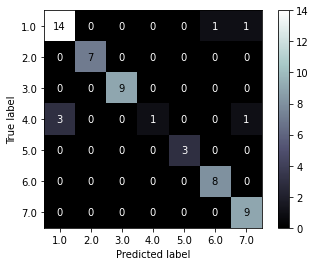

In [63]:
#We print the confusion matrix, as this will help us understand the precision, recall and f1 score of the model.

#Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'bone')
plt.show()

In [ ]:
# As we can see, we are able to obtain the confusion matrix for the 7 classes of interest in our dataset. We also have the precion recall and f1 score of each class
# We also have the overall accuracy of the SVM model. 
# A detailed explanation of the results can be found in the report submitted.